### Лабораторная работа №6

Выполнила Карасева Екатерина M33351

In [3]:
import cv2
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

import random
import numpy as np

import torch.nn as nn

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet50

from tqdm.notebook import tqdm, trange

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

OUTPUT_DIM = 10  # Количество классов
EPOCH_NUM = 4  # Сколько эпох будет обучать модель

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Анализ картинок

Создайте эмбеддинги изображений и отобразите их в tensorboard projector'е

1. Скачайте датасет [CelebA](https://pytorch.org/vision/stable/datasets.html#celeba) или любой другой не рассмотренный на лекции

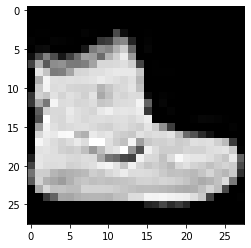

In [4]:
basic_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

basic_transform2 = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

dataset_train = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    transform=basic_transform2,
    download=True
)

dataset_test = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    transform=basic_transform,
    download=True
)

img = dataset_train[0][0].detach().numpy()
plt.imshow(np.transpose(img, (1, 2, 0)))

2. Выберите одну из предобученных [моделей torchvision](https://pytorch.org/vision/stable/models.html)

In [5]:
class FashionClassifier(nn.Module):
    def __init__(self, ouput_dim):
        super(FashionClassifier, self).__init__()  # "Регистрируем" создаваемый объект как нейросетевую модель
        self.model = resnet50(pretrained=True)  # Скачиваем пред-обученную основу для нашей модели

        # "Замораживаем" все веса для ускорения обучения (мы считаем что они уже хорошо обучены)
        for param in self.model.parameters():
            param.requires_grad = False

        # Создаем "голову" которую мы и будем обучать
        self.fc1 = nn.Sequential(
            nn.Linear(1000, 64),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Dropout(0.25),
            nn.Linear(64, ouput_dim)
        )

    def embed(self, x):
        return self.fc1(self.model(x))

    # Описываем как именно наша модель будет генерировать предсказания
    def forward(self, x):
        resnet_out = self.embed(x)
        return self.fc2(resnet_out)


model = FashionClassifier(OUTPUT_DIM)
model = model.to(DEVICE)  # Переносим модель на GPU

3. Создайте эмбеддинги изображений из датасета

In [6]:
train_items = [dataset_train[i] for i in range(1000)]
xs, ys = zip(*train_items)

xs = torch.stack(xs)
xs = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(xs)
xs.size()

embs = model.model(xs)
embs.size()

torch.Size([1000, 1000])

4. Визуализируйте эмбеддинги в tensorboard projector

D:\study\5sem\DA\lab6\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\study\5sem\DA\lab6\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


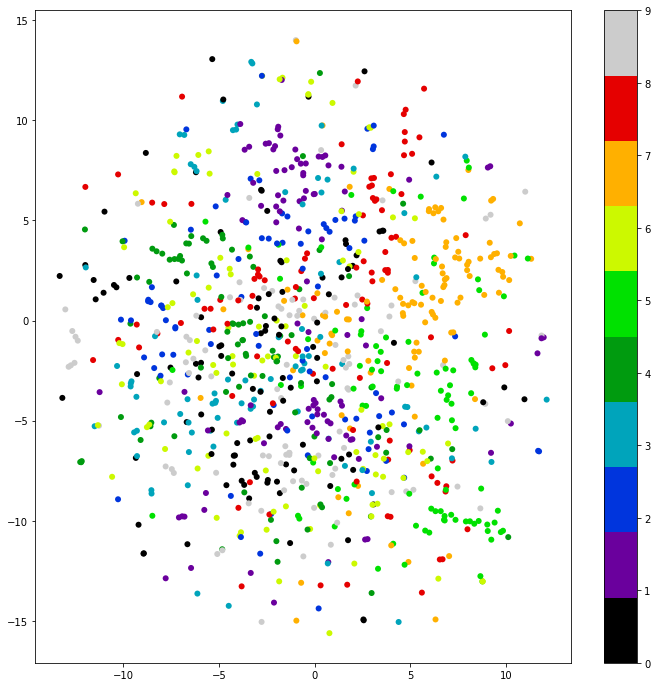

In [7]:
from sklearn.manifold import TSNE

points = TSNE(n_components=2, random_state=42).fit_transform(embs.detach().numpy())


def draw_clusters(x, y, cols):
    plt.figure(figsize=(12, 12))
    plt.scatter(x, y,
                c=cols, edgecolor='none',
                cmap=plt.cm.get_cmap('nipy_spectral', OUTPUT_DIM))
    plt.colorbar()
    plt.show()


import matplotlib.pyplot as plt

draw_clusters(points[:, 0], points[:, 1], ys)

In [8]:
from tensorboardX import SummaryWriter

writer = SummaryWriter()

writer.add_embedding(embs, label_img=xs)
writer.close()

# Лена

Примените фильтр к изображению Лены

1. Скачайте изображение [Лены](http://optipng.sourceforge.net/pngtech/img/lena.png)

In [9]:
!curl http: // optipng.sourceforge.net / pngtech / img / lena.png --output lena.png

<html>

<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta name="Author" content="Cosmin Truta, Ramona C. Truta">
<title>OptiPNG Home Page</title>
<style type="text/css">
<!--
  body {
    background-color: white;
    color: black;
    margin-top: 3ex;
    margin-bottom: 3ex
  }
  div {
    margin-top: 3ex;
    margin-bottom: 3ex;
    margin-left: 1em;
    margin-right: 1em;
  }
  a, a:link {
    color: blue;
    text-decoration: underline;
  }
  a:visited {
    color: purple;
    text-decoration: underline;
  }
  a:active, a:hover {
    color: red;
    text-decoration: underline;
  }
  a.file, a.file:visited {
    color: green;
    text-decoration: underline;
  }
  a.file:active, a.file:hover {
    background-color: green;
    color: white;
    text-decoration: none;
  }
  code.file {
    color: green;
    font-weight: bold;
  }
  em {
    font-family: Georgia, serif;
  }
  h1, h2, h3, h4, h5, h6 {
    font-family: Helvetica Neue, Nimbus Sans L, Arial, sa

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: http
curl: (3) <url> malformed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  6649  100  6649    0     0   6649      0  0:00:01 --:--:--  0:00:01 11830
curl: (3) <url> malformed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: pngtech
curl: (3) <url> malformed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: img
curl: (3) <u


  hr {
    margin-left: 1em;
    margin-right: 1em;
  }
  hr.letter {
    margin-left: 0em;
    margin-right: 0em;
  }
  ul, ul.disc {
    list-style-type: disc;
  }
  ul.square {
    list-style-type: square;
  }
-->
</style>
</head>

<body>

<div>
<h1>OptiPNG: Advanced PNG Optimizer</h1>

<b>OptiPNG</b> is a PNG optimizer that recompresses image files to a smaller
size, without losing any information. This program also converts external
formats (BMP, GIF, PNM and TIFF) to optimized PNG, and performs PNG integrity
checks and corrections.
<br>
If you wish to learn how PNG optimization works, or to know about other
similar tools, see the PNG-Tech article
<a href="http://optipng.sourceforge.net/pngtech/optipng.html"><i>A guide to PNG optimization</i></a>.
</div>

<hr>

<div>
<b><font color="red">IMPORTANT UPGRADE</font></b>
<br>
<i>See the <b>Security Information</b> section below.</i>
</div>

<hr>

<table border="0" width="100%">
<tr>
<td width="50%" align="left" valign="top">
<div>
<h3

2. Найдите фильтр для выделения признака на изображении. В лекции показан пример фильтра Собеля. Использовать примеры с лекций нельзя. Начать поиск фильтра можно с [этой страницы](https://en.wikipedia.org/wiki/Feature_(computer_vision)#Extraction)
3. Реализуйте процедуру свёртки изображения с фильтром
4. Сверните Лену

  to version <b><font color="red">0.7.6</font></b>) are affected.
  </p>
</li>
<li>
  <p>
  Henri Salo and Hans Jerry Illikainen reported two vulnerabilities in the
  compressed BMP decoder, discovered by using the
  <a href="http://lcamtuf.coredump.cx/afl/">American Fuzzy Lop</a>.
  All versions prior to <b>0.7.6</b> that support compressed BMP files
  (i.e. from version <b><font color="red">0.6</font></b>
  to version <b><font color="red">0.7.5</font></b>) are affected.
  </p>
</li>
<li>
  <p>
  Gynvael Coldwind and Mateusz Jurczyk reported a use-after-free vulnerability
  in the palette reduction code, affecting the versions
  <b><font color="red">0.7</font></b>,
  <b><font color="red">0.7.1</font></b> and
  <b><font color="red">0.7.2</font></b>,
  partially fixed in version
  <b><font color="red">0.7.3</font></b>,
  and fully fixed in version
  <b>0.7.4</b>.
  </p>
</li>
</ul>
</div>
</td>

</tr>
</table>

<hr>

<table border="0" width="100%">
<tr>
<td width="50%" align="left" vali

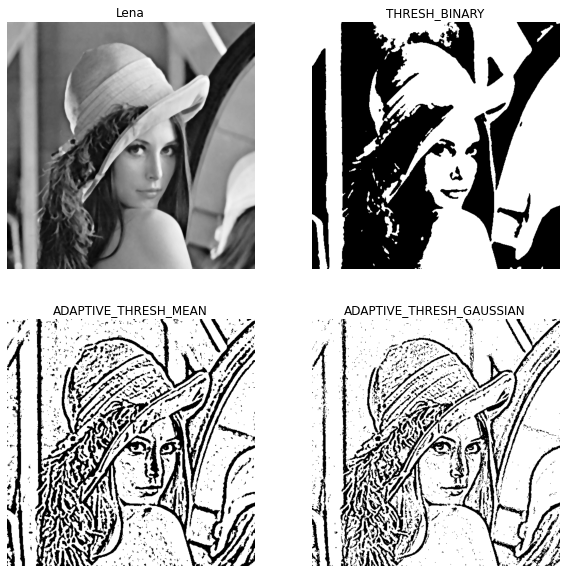

In [10]:
img = cv2.imread('lena.png')
img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rbg2 = cv2.medianBlur(img_rbg, 5)

gray2 = cv2.medianBlur(gray, 5)
ret, th = cv2.threshold(gray2, 127, 255, cv2.THRESH_BINARY)
th_mean = cv2.adaptiveThreshold(gray2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th_gauss = cv2.adaptiveThreshold(gray2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(10, 10))
ax = plt.subplot(221)
ax.set_title('Lena')
ax.imshow(gray2, cmap='gray')
ax.axis('off')

ax = plt.subplot(222)
ax.set_title('THRESH_BINARY')
ax.imshow(th, cmap='gray')
ax.axis('off');

ax = plt.subplot(223)
ax.set_title('ADAPTIVE_THRESH_MEAN')
ax.imshow(th_mean, cmap='gray')
ax.axis('off');

ax = plt.subplot(224)
ax.set_title('ADAPTIVE_THRESH_GAUSSIAN')
ax.imshow(th_gauss, cmap='gray')
ax.axis('off');
